In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)

In [7]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\archive\\MagicBricks.csv")

In [8]:
df.head(6)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [10]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Furnishing       3
Locality       365
Status           2
Transaction      2
Type             2
dtype: int64

In [11]:
# Dropping of 'Locality' column because its irrelevant
df.drop(columns='Locality', inplace=True)
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [ ]:
# data preprocessing 1

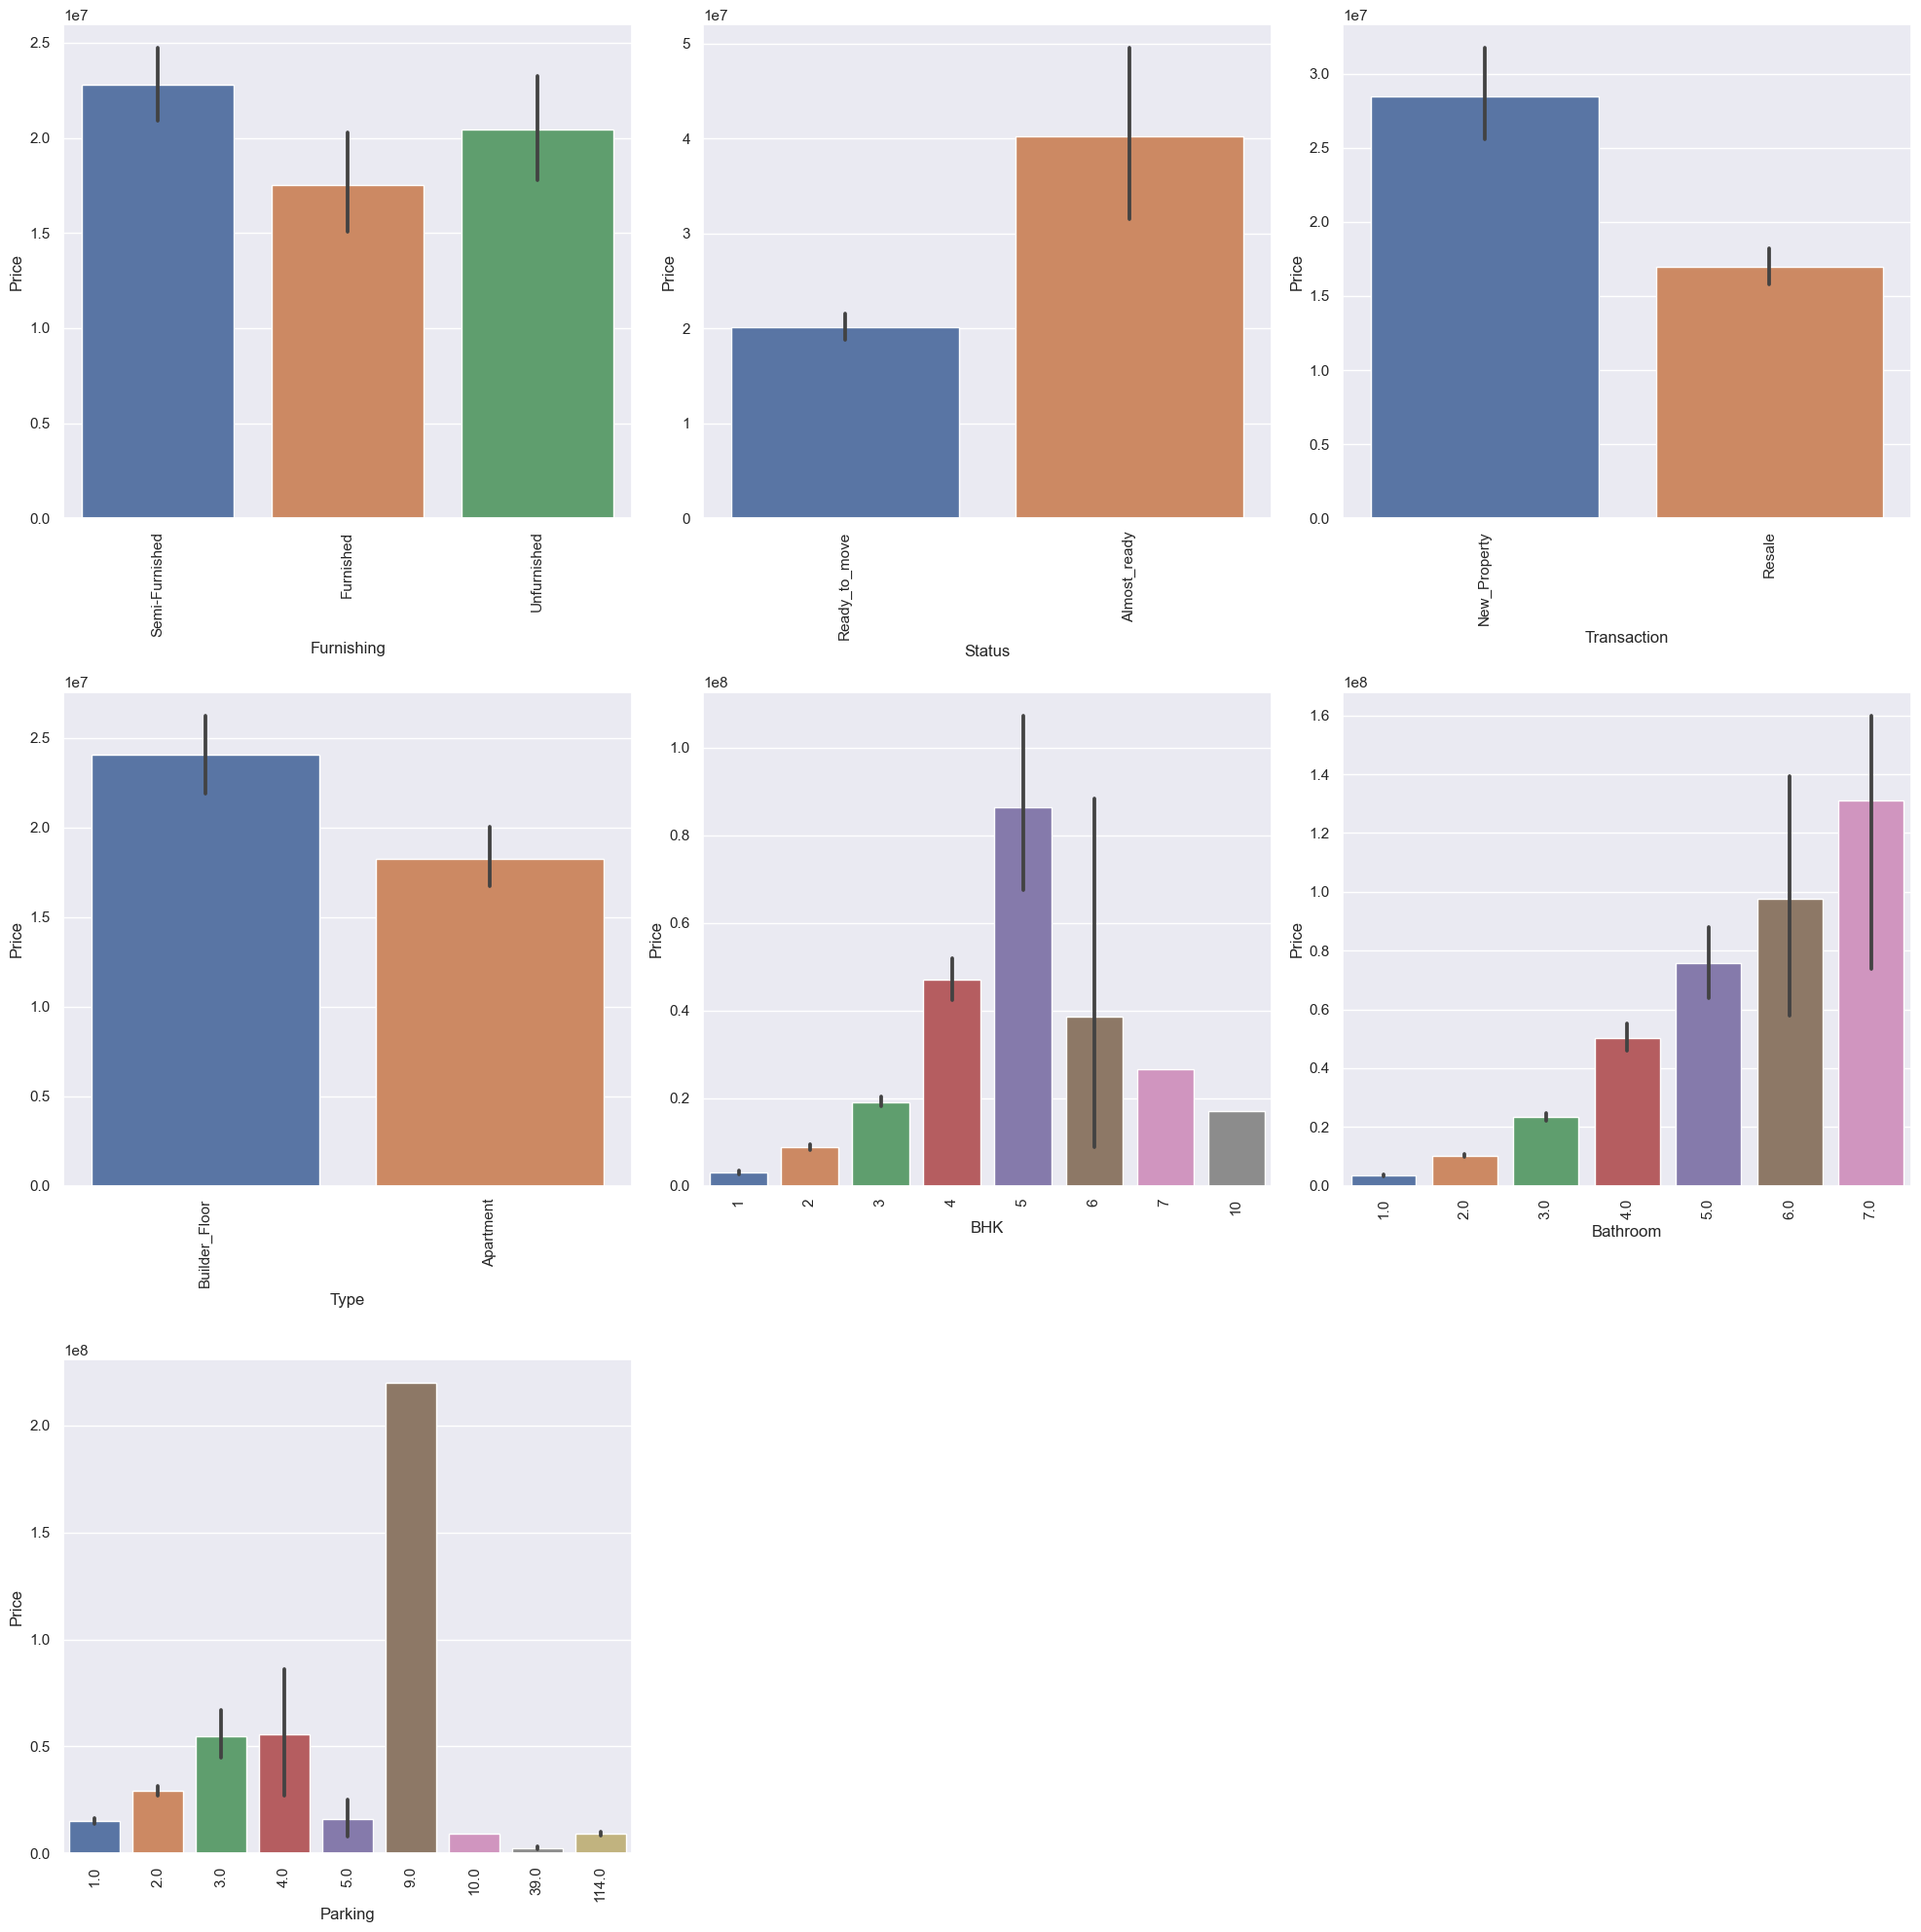

In [12]:
# list of categorical variables to plot
cat_vars = ['Furnishing', 'Status', 'Transaction', 'Type', 'BHK', 'Bathroom', 'Parking']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the eigth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

# show plot
plt.show()

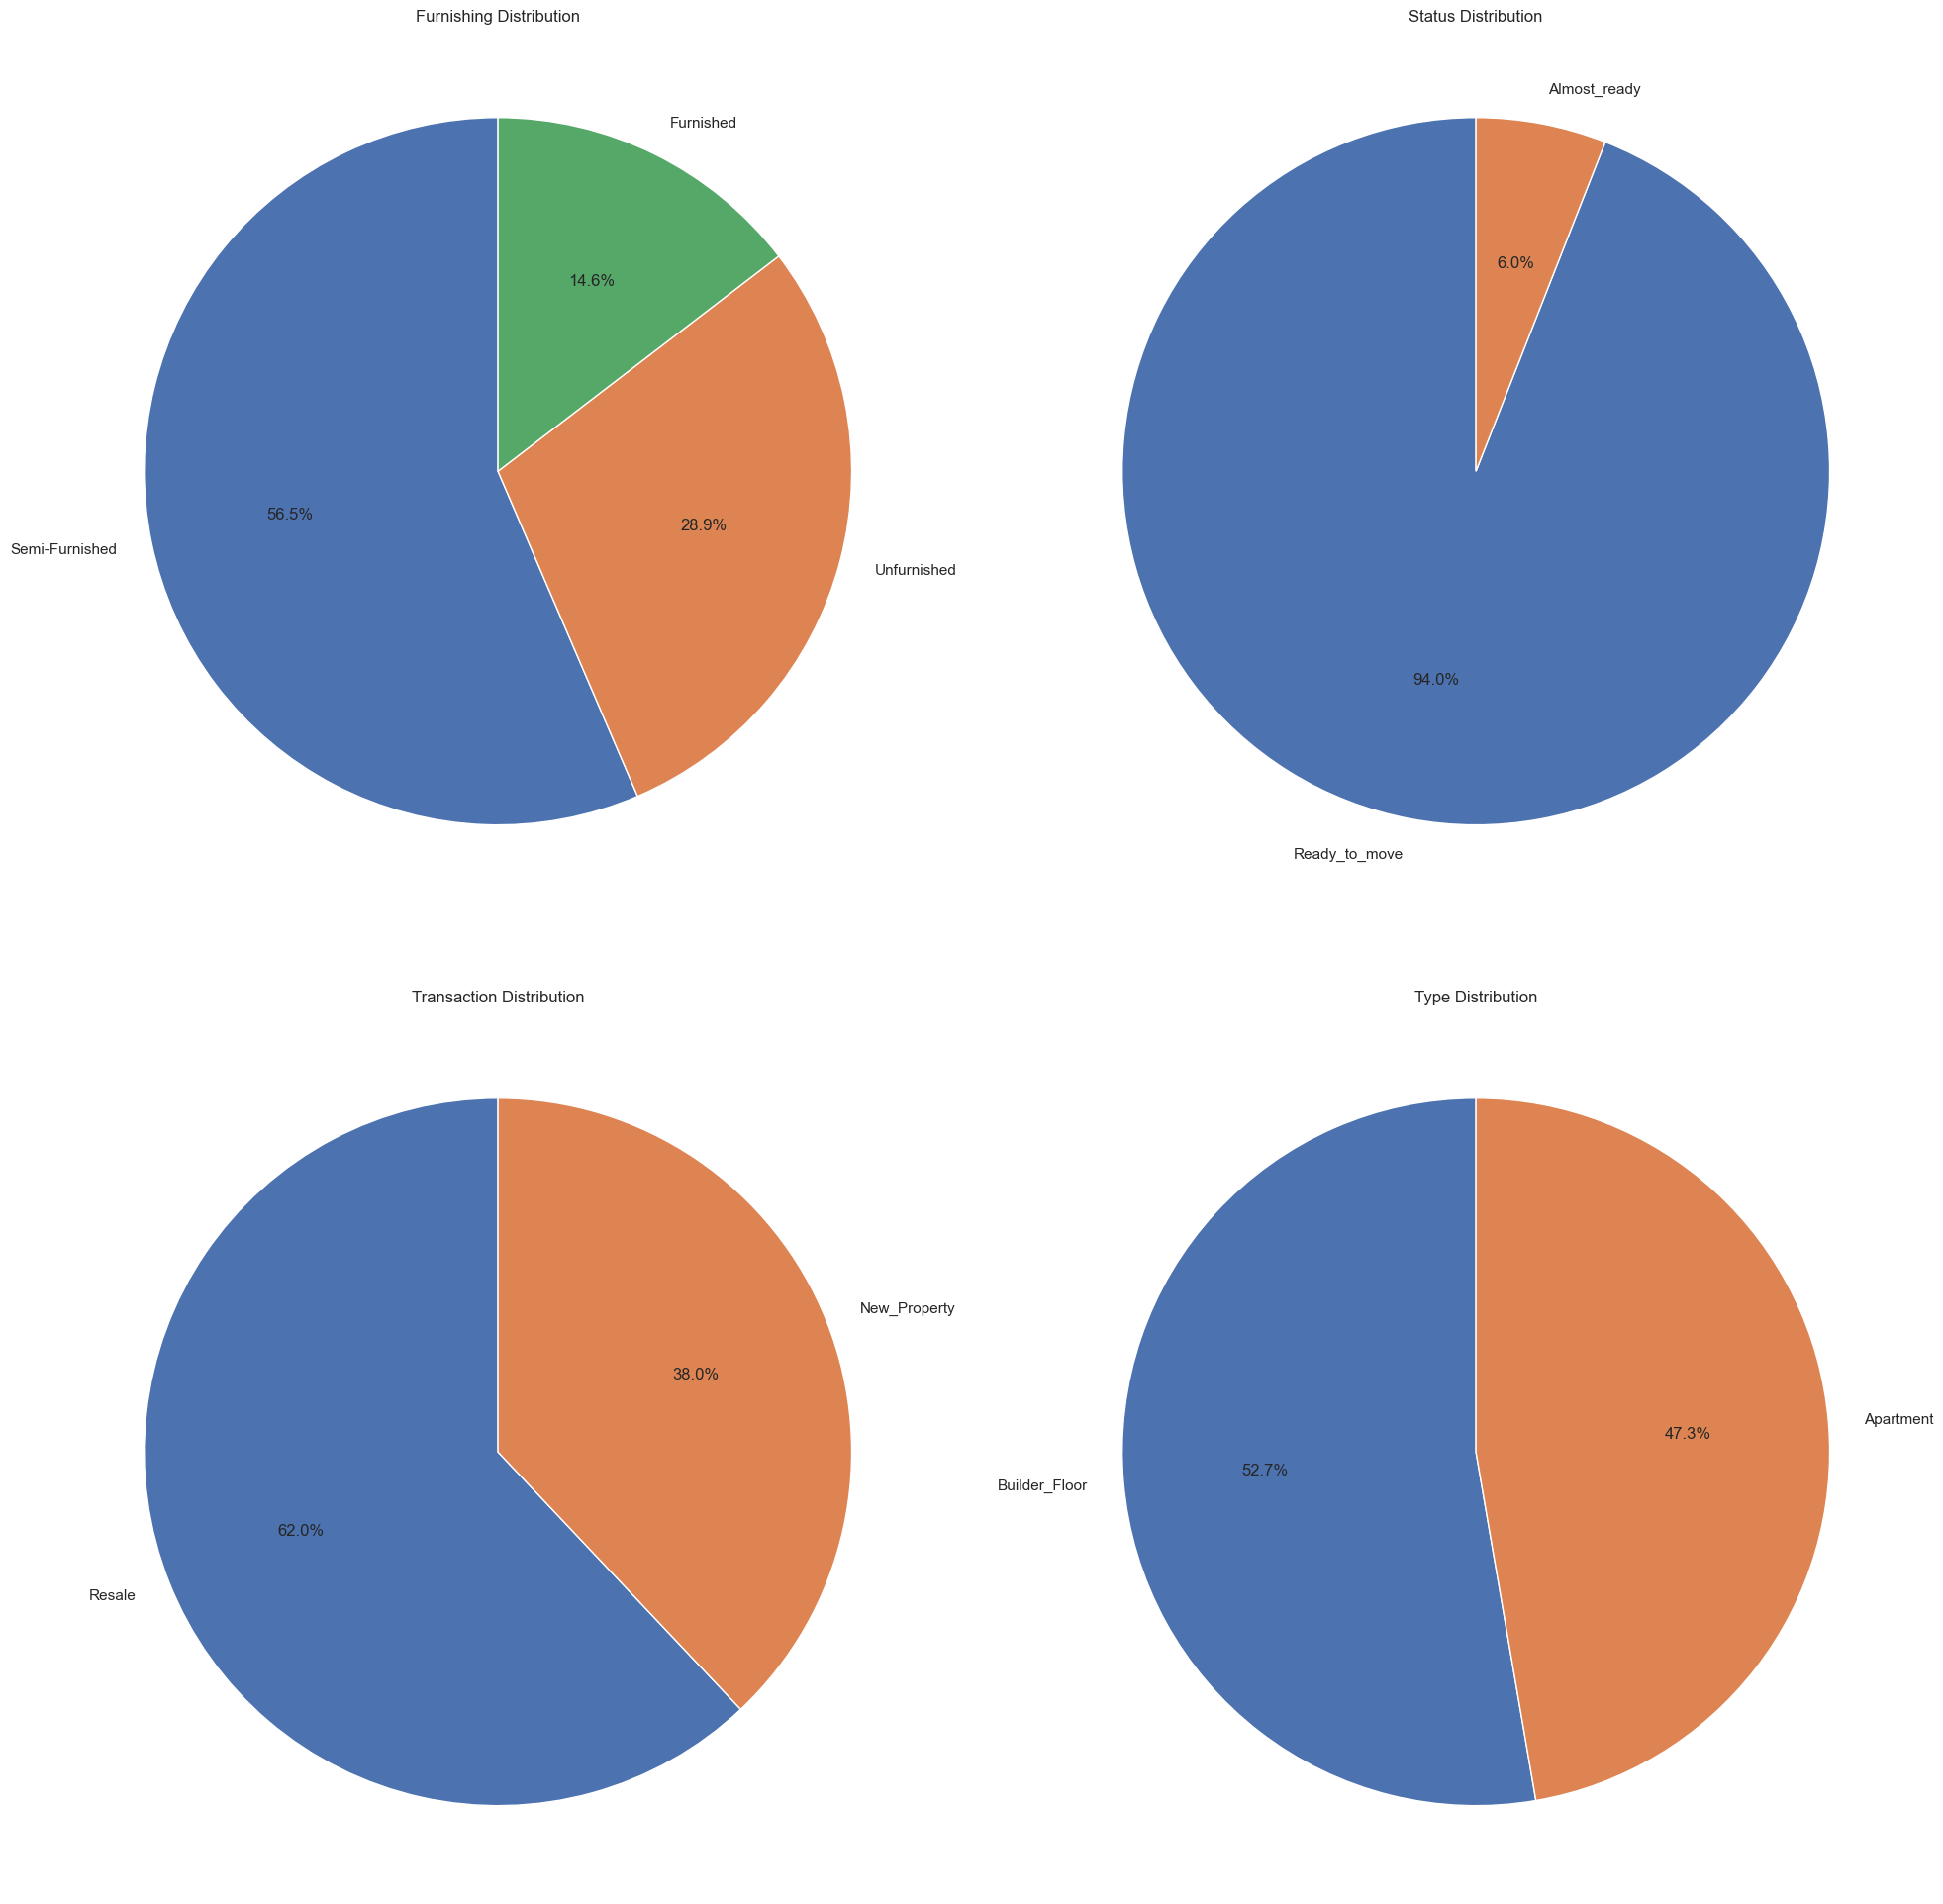

In [13]:
cat_vars = ['Furnishing', 'Status', 'Transaction', 'Type']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

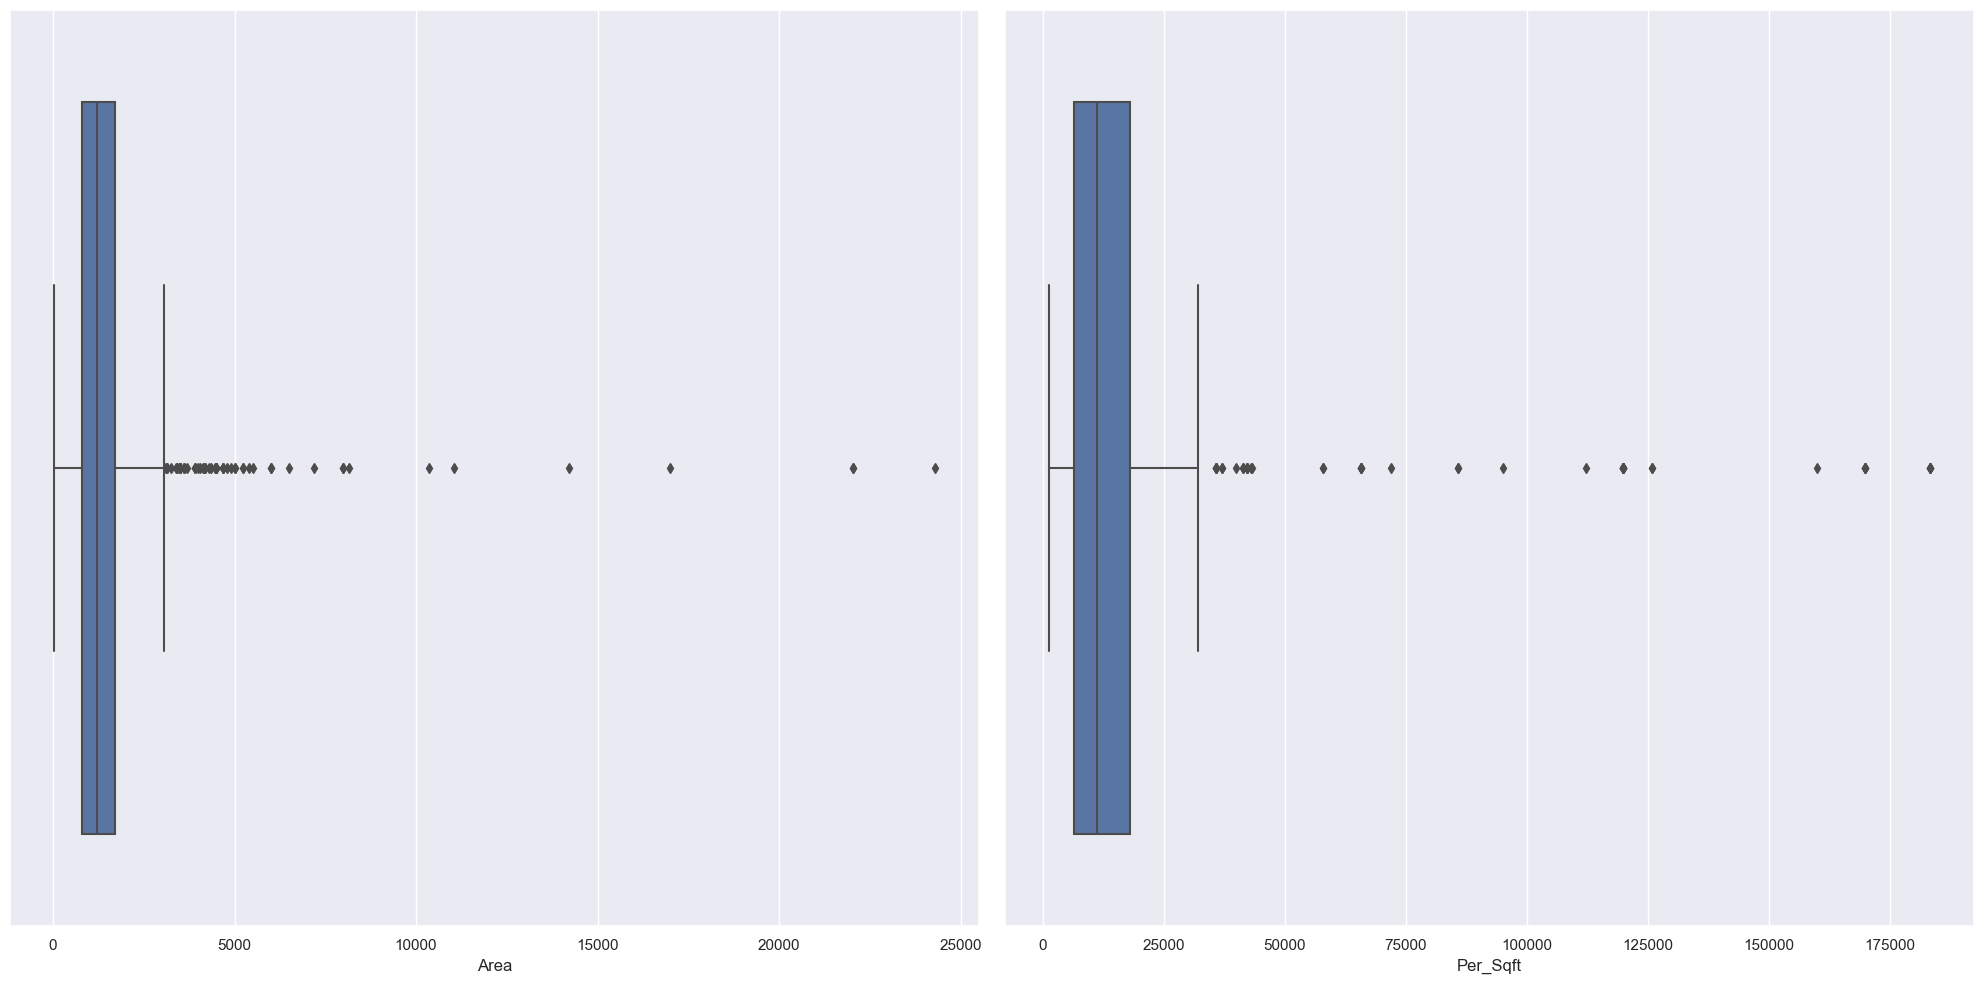

In [14]:
num_vars = ['Area', 'Per_Sqft']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

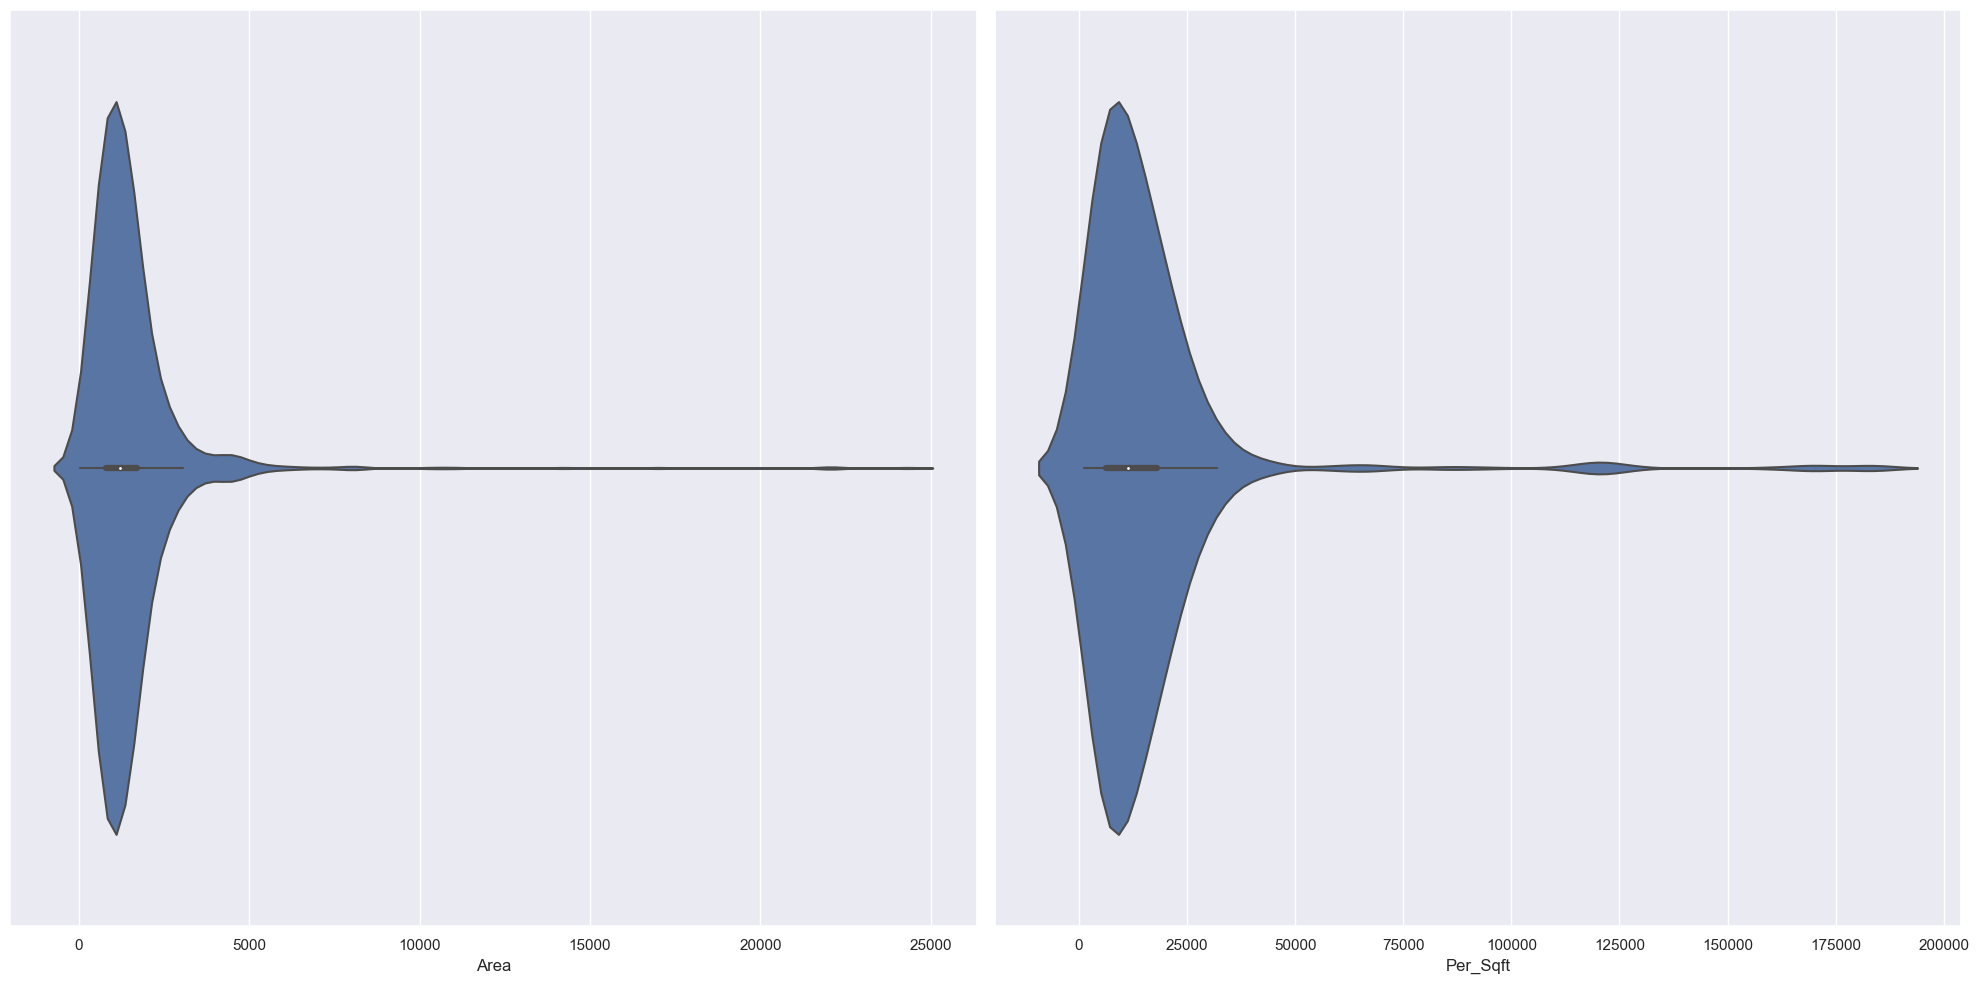

In [15]:
num_vars = ['Area', 'Per_Sqft']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

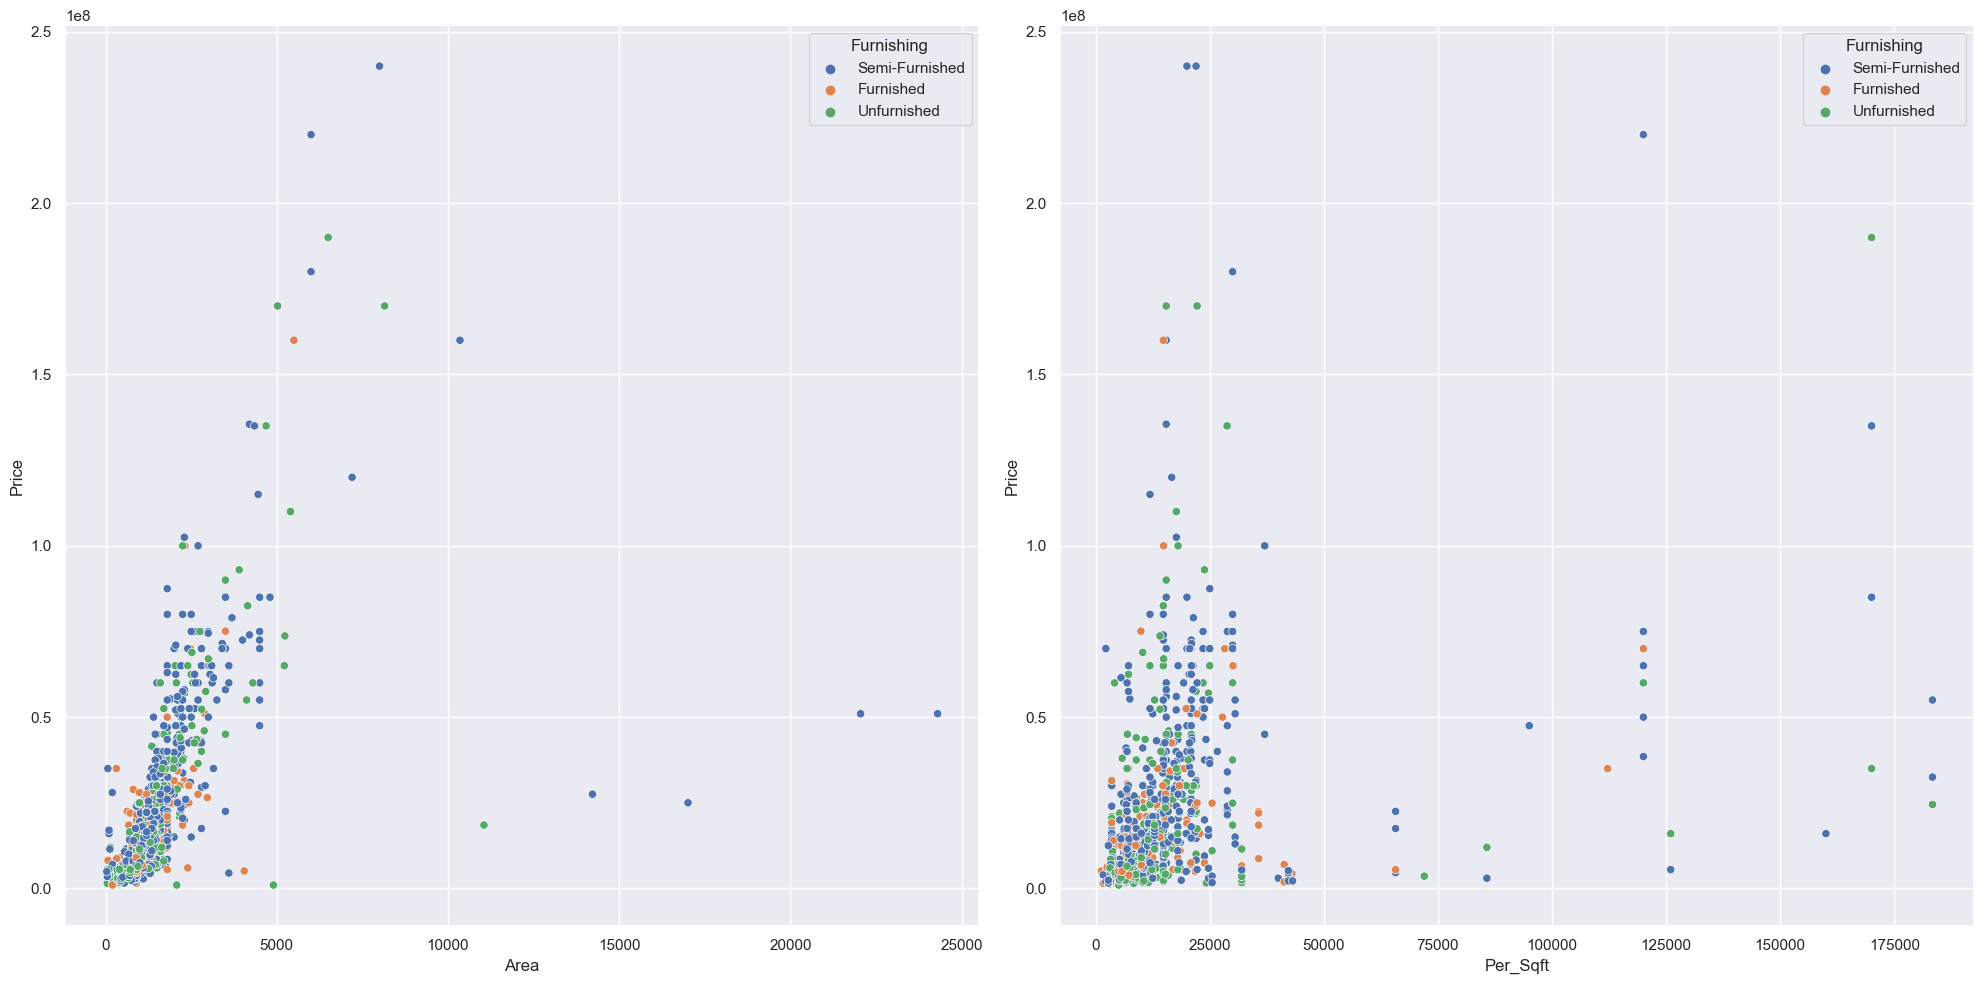

In [16]:
num_vars = ['Area', 'Per_Sqft']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Furnishing', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

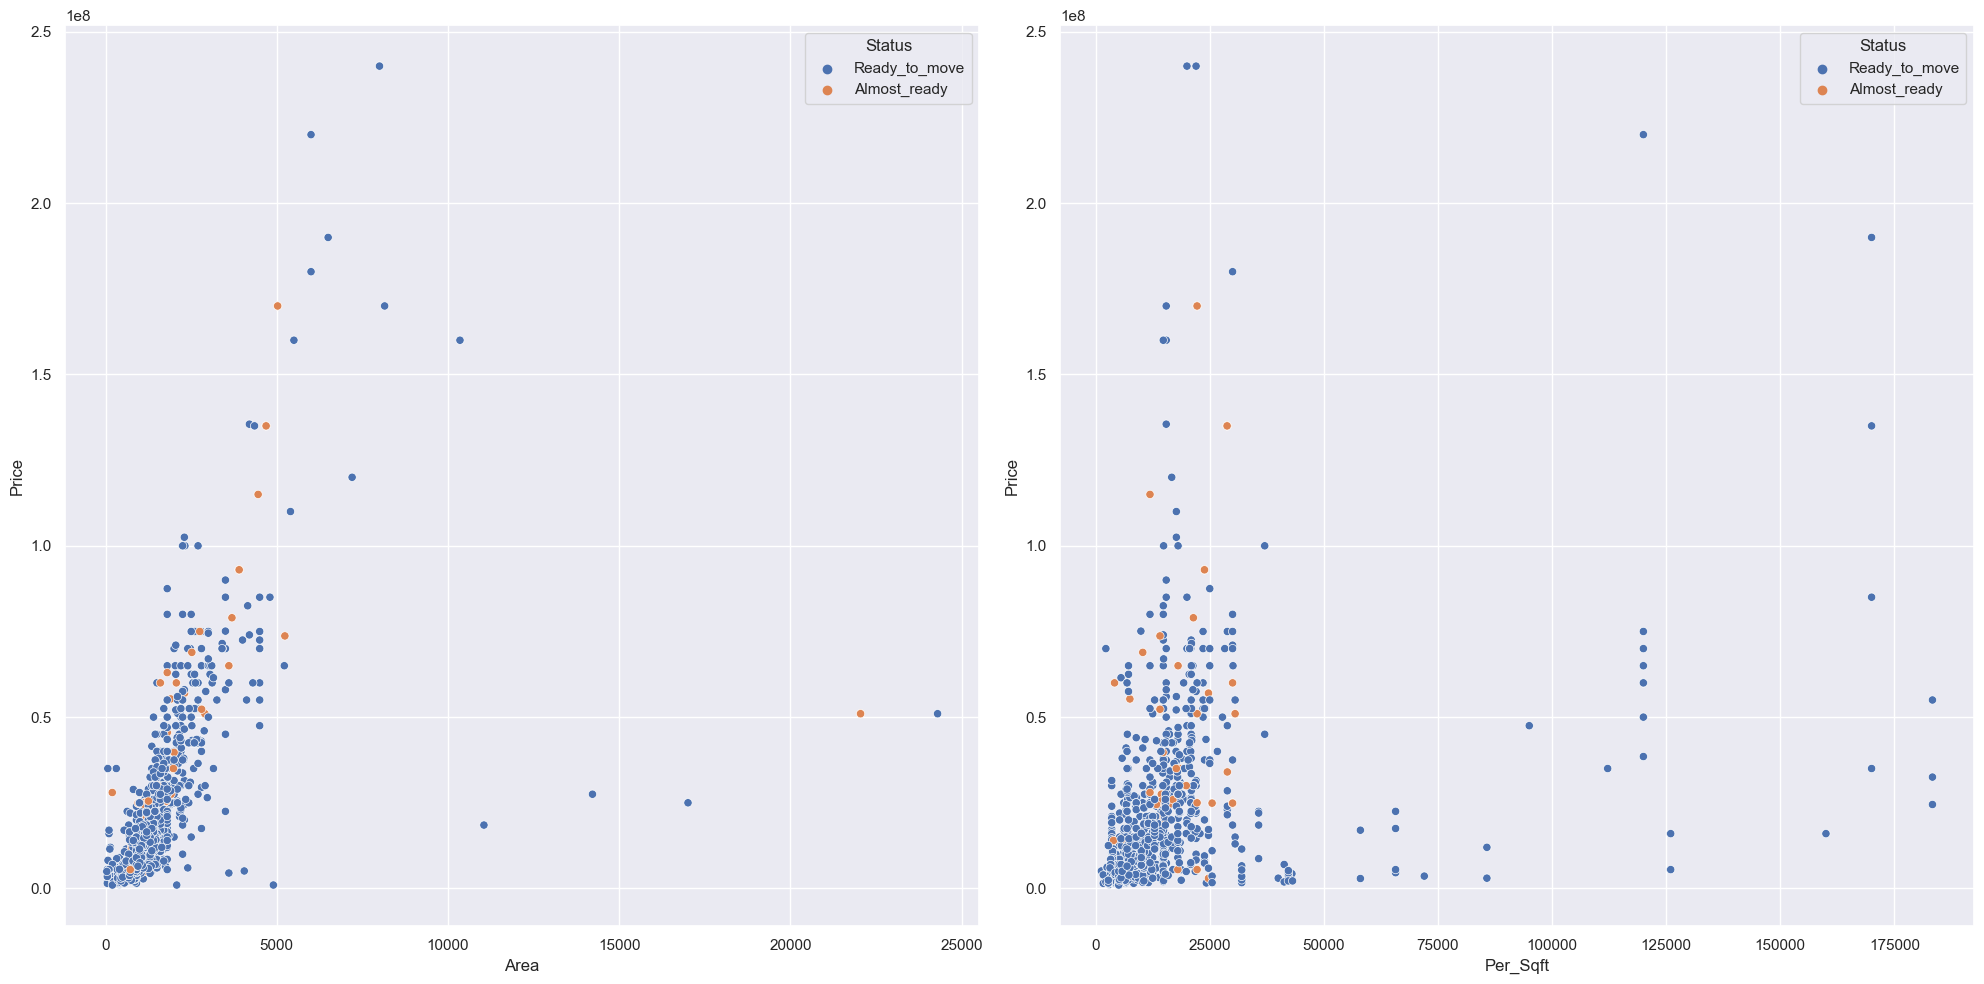

In [17]:
num_vars = ['Area', 'Per_Sqft']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Status', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

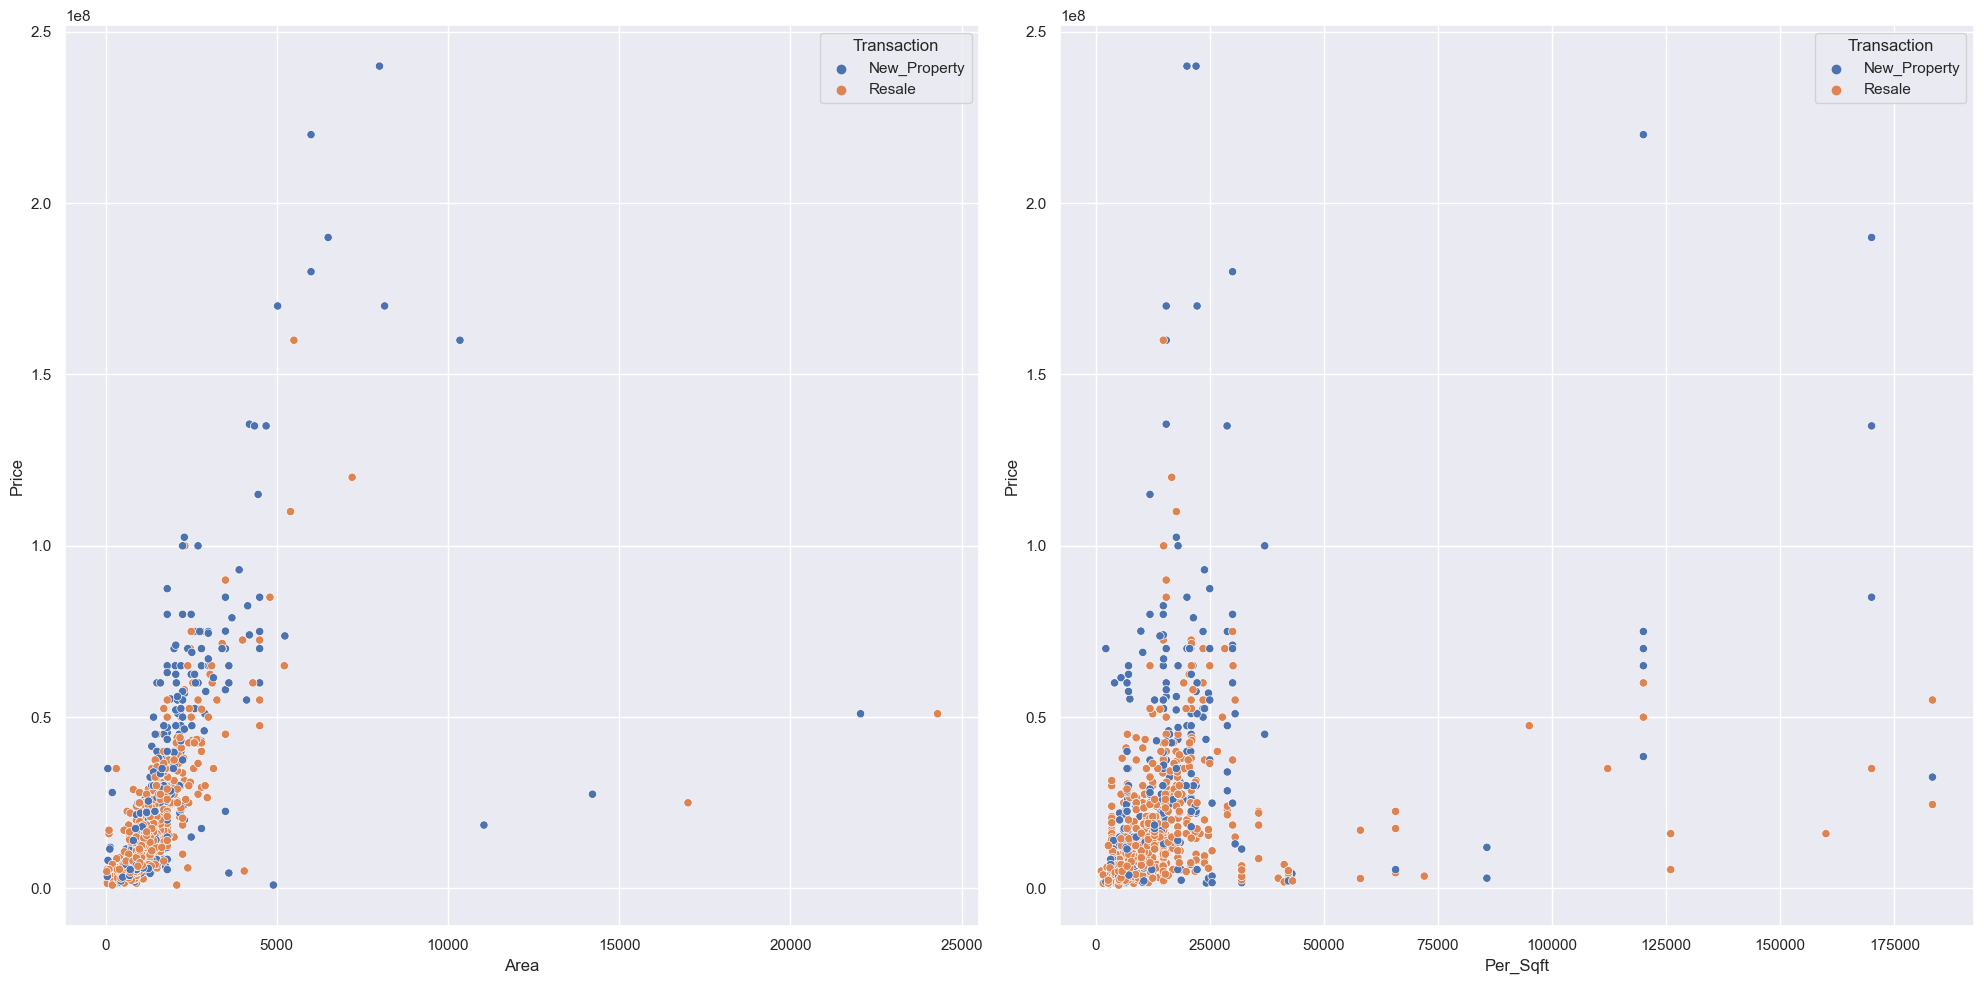

In [18]:
num_vars = ['Area', 'Per_Sqft']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Transaction', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

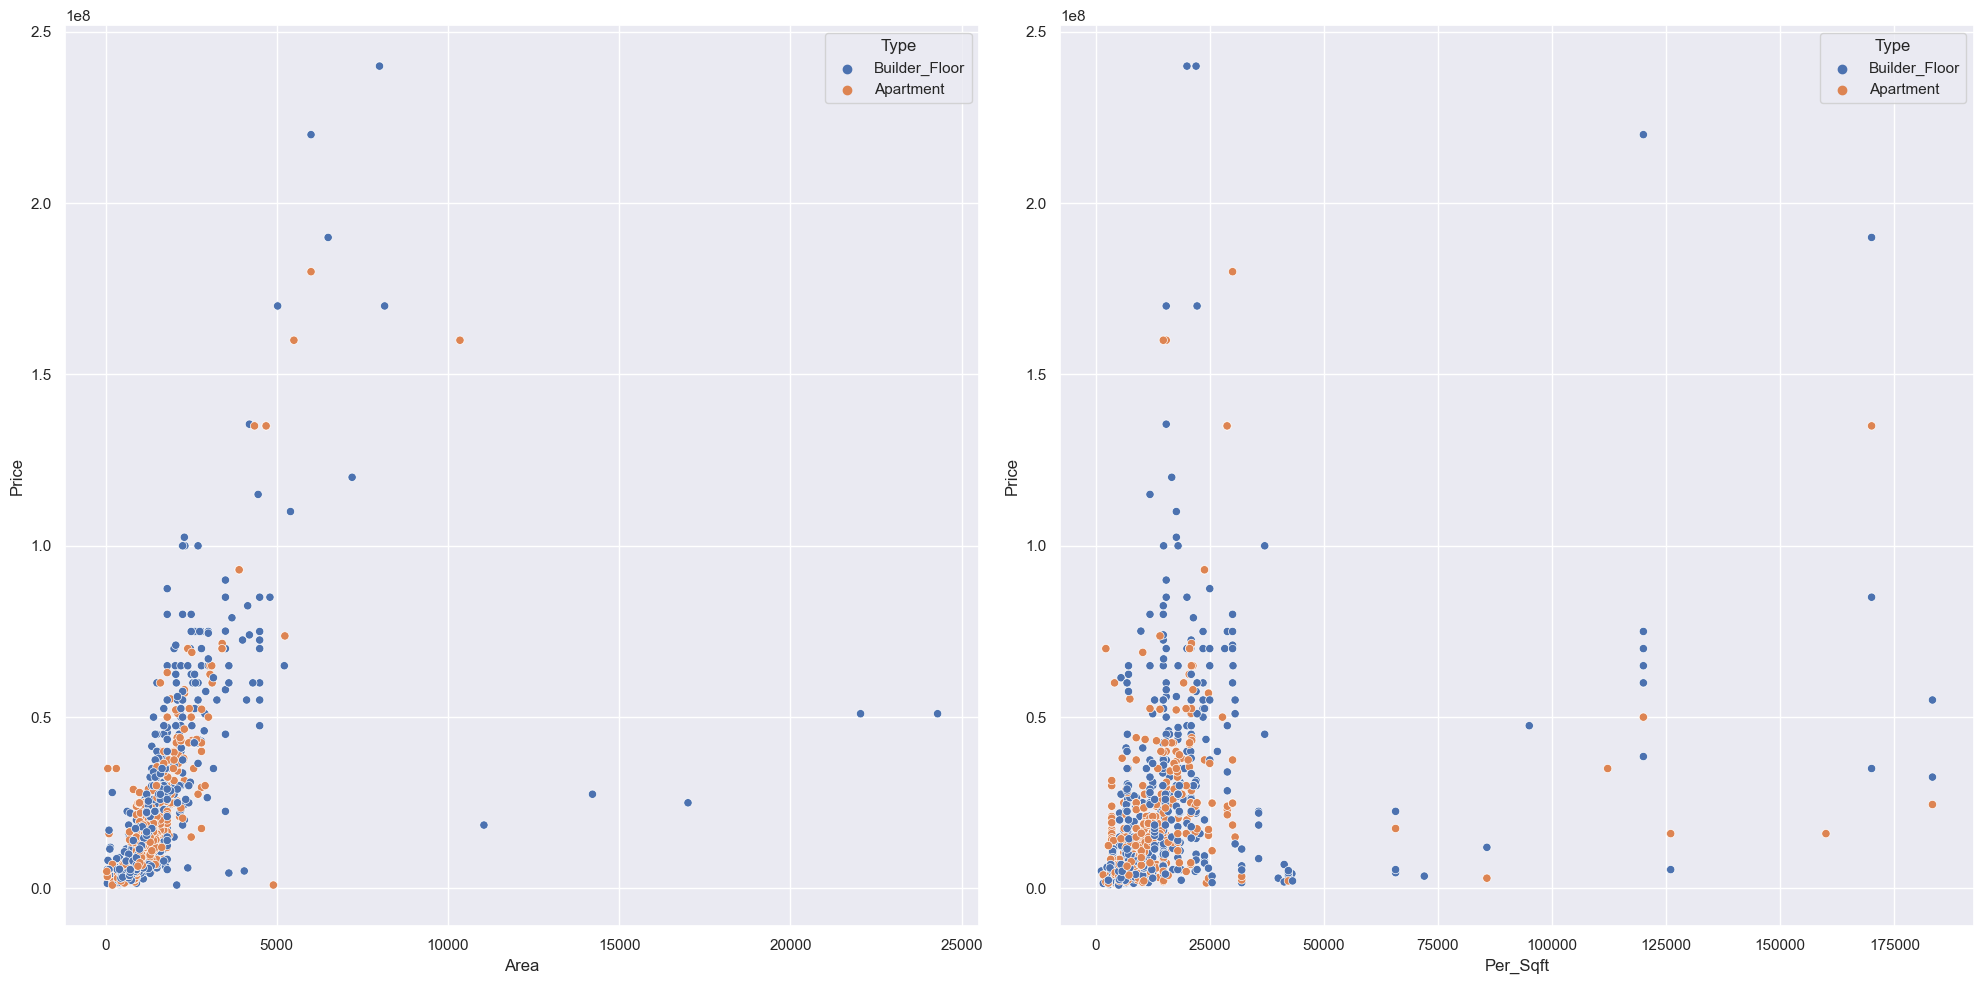

In [19]:
num_vars = ['Area', 'Per_Sqft']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Type', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [20]:
# data pre processing 2

In [21]:
df.shape

(1259, 10)

In [22]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Per_Sqft      19.142176
Parking        2.621128
Furnishing     0.397141
Type           0.397141
Bathroom       0.158856
dtype: float64

In [23]:
# handling of null values with the median
df['Per_Sqft'].fillna(df['Per_Sqft'].median(), inplace=True)
df['Parking'].fillna(df['Parking'].median(), inplace=True)

In [24]:
# drop of 3 columns which have null values less than 1%
df.dropna(subset=['Furnishing', 'Type', 'Bathroom'], inplace=True)
df.head()

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,11291.5
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [25]:
# handling of the object data types

In [26]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Furnishing: ['Semi-Furnished' 'Furnished' 'Unfurnished']
Status: ['Ready_to_move' 'Almost_ready']
Transaction: ['New_Property' 'Resale']
Type: ['Builder_Floor' 'Apartment']


In [27]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Furnishing: [1 0 2]
Status: [1 0]
Transaction: [0 1]
Type: [1 0]


In [28]:
# corelation heat map

<AxesSubplot:>

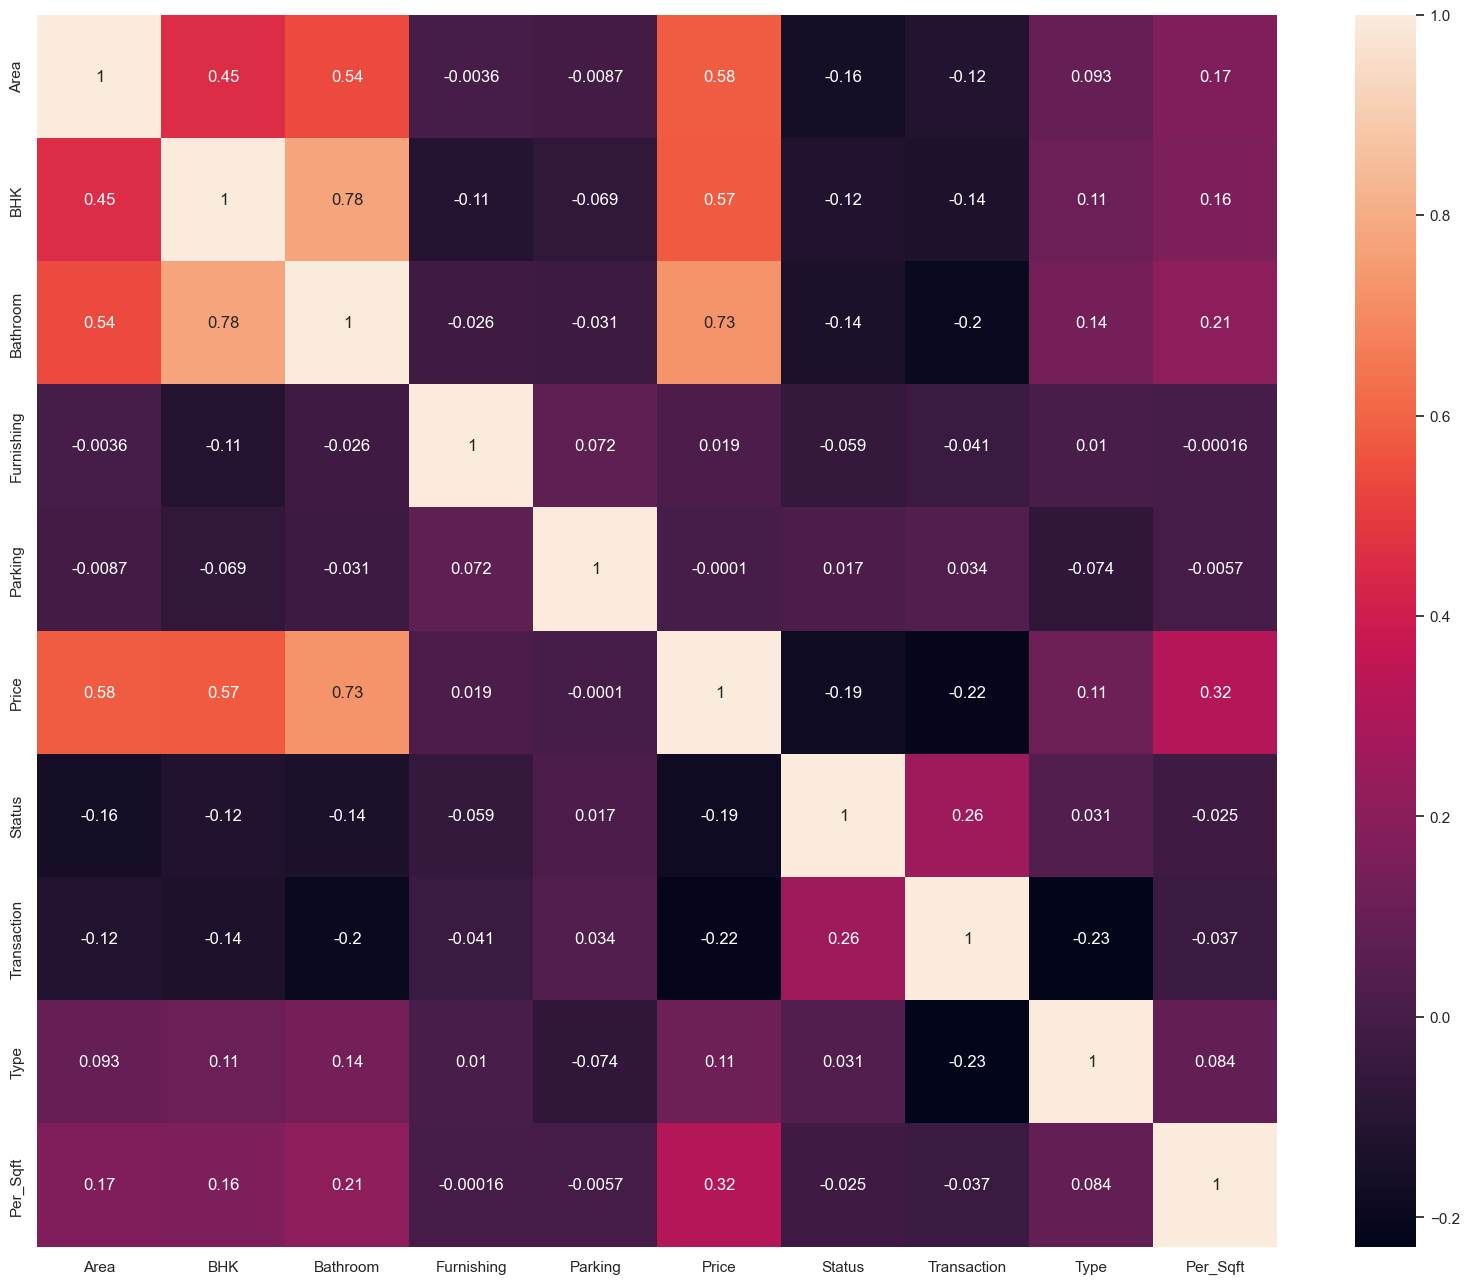

In [29]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [30]:
# train test dataset
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=0)

In [31]:
# removal of the outliers
# Concatenate X_train and y_train for outlier removal
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the IQR values for each column
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from X_train
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Separate X_train and y_train after outlier removal
X_train = train_df.drop('Price', axis=1)
y_train = train_df['Price']

In [32]:
# using Decision tree for the problem solving

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}


In [33]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42, max_depth=6, max_features='auto', min_samples_leaf=4, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=4,
                      random_state=42)

In [34]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 8490104.759742005
MAPE is 0.48423957735847867
MSE is 517184355319855.8
R2 score is 0.4080663111331838
RMSE score is 22741687.609319054


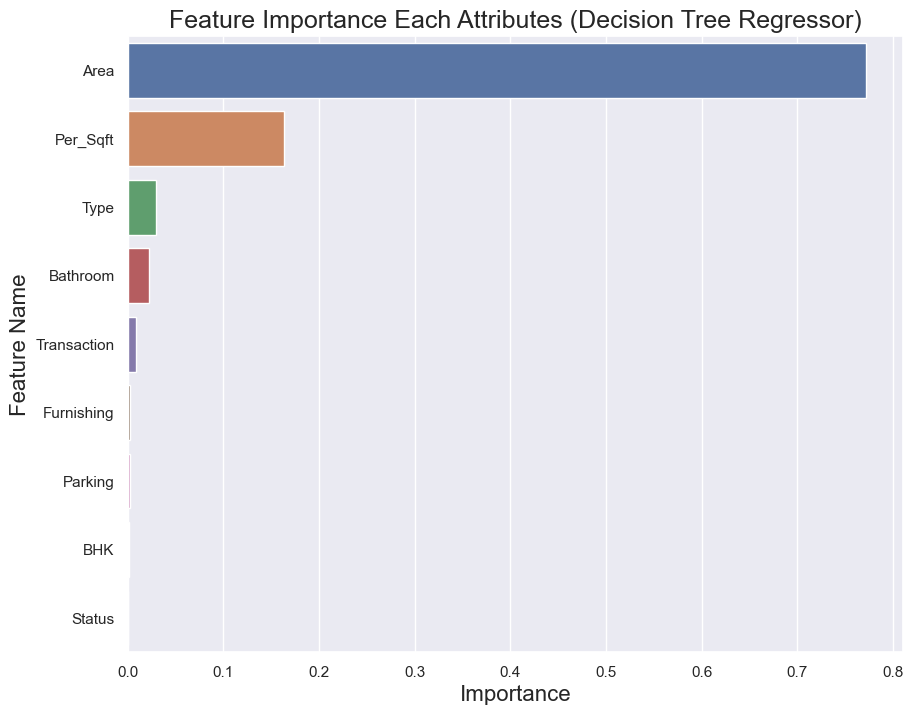

In [35]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

     ------------------------------------ 435.6/435.6 kB 353.6 kB/s eta 0:00:00


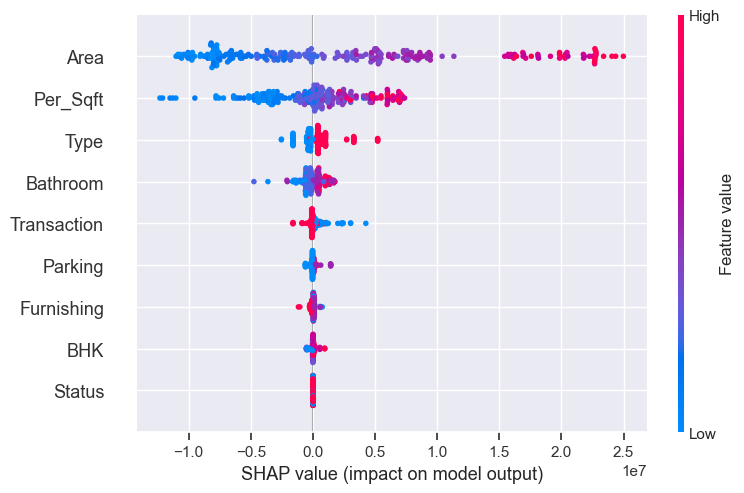

In [38]:
!pip install shap

import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

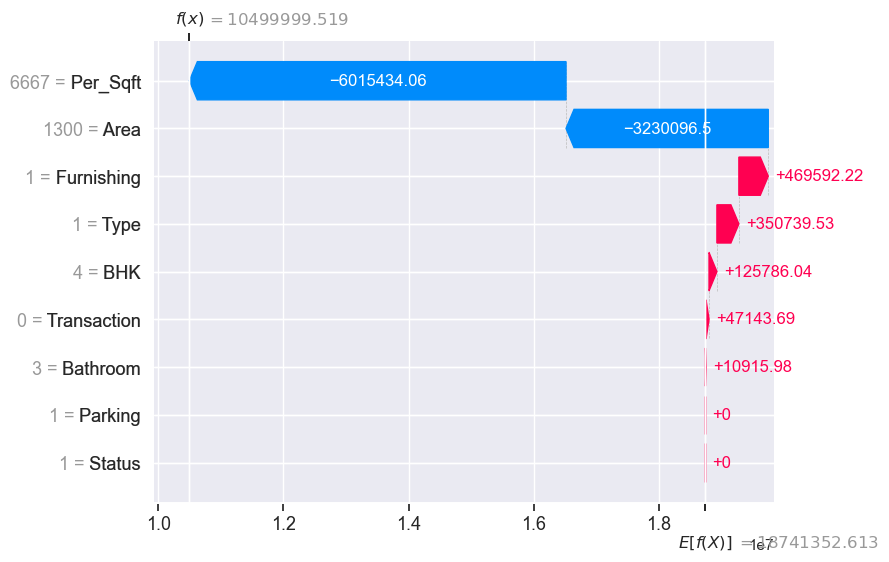

In [39]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])